# Diagnosing Heart Disease

Data contains;

* age - age in years
* sex - (1 = male; 0 = female)
* cp - chest pain type
* trestbps - resting blood pressure (in mm Hg on admission to the hospital)
* chol - serum cholestoral in mg/dl
* fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
* restecg - resting electrocardiographic results
* thalach - maximum heart rate achieved
* exang - exercise induced angina (1 = yes; 0 = no)
* oldpeak - ST depression induced by exercise relative to rest
* slope - the slope of the peak exercise ST segment
* ca - number of major vessels (0-3) colored by flourosopy
* thal - 3 = normal; 6 = fixed defect; 7 = reversable defect
* target - have disease or not (1=yes, 0=no)

In [1]:
import numpy as np 
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns 

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [2]:
import os

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/heart-disease-uci/heart.csv


In [3]:
%matplotlib inline

plt.style.use('seaborn')
sns.set(style="darkgrid")
plt.rcParams['figure.figsize'] = (10.0, 8.0)
plt.rcParams['xtick.labelsize'] = 14 
plt.rcParams['ytick.labelsize'] = 14 
plt.rcParams['axes.labelsize'] = 18

sns.set(font_scale=1.8)
sns.set(style="darkgrid")

pd.options.display.max_columns = 100
pd.options.display.max_rows = 100
pd.options.mode.chained_assignment = None
pd.set_option('display.float_format', lambda x: '%.4f' % x)
np.set_printoptions(formatter={'float_kind':'{:f}'.format})

# Import the Data

In [4]:
raw_df = pd.read_csv("../input/heart-disease-uci/heart.csv")

raw_df.shape

(303, 14)

# Exploring the data + Preprocessing

Let's change the column names to be a bit clearer


In [5]:
raw_df.columns = ['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholesterol', 'fasting_blood_sugar', 'rest_ecg', 'max_heart_rate_achieved',
       'exercise_induced_angina', 'st_depression', 'st_slope', 'num_major_vessels', 'thalassemia', 'target']

### Get some basic feel for the data

In [6]:
raw_df.sample(10)

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
0,63,1,3,145,233,1,0,150,0,2.3000,0,0,1,1
33,54,1,2,125,273,0,0,152,0,0.5000,0,1,2,1
184,50,1,0,150,243,0,0,128,0,2.6000,1,0,3,0
149,42,1,2,130,180,0,1,150,0,0.0000,2,0,2,1
77,59,1,1,140,221,0,1,164,1,0.0000,2,0,2,1
124,39,0,2,94,199,0,1,179,0,0.0000,2,0,2,1
198,62,1,0,120,267,0,1,99,1,1.8000,1,2,3,0
64,58,1,2,140,211,1,0,165,0,0.0000,2,0,2,1
141,43,1,0,115,303,0,1,181,0,1.2000,1,0,2,1
194,60,1,2,140,185,0,0,155,0,3.0000,1,0,2,0


In [7]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      303 non-null    int64  
 1   sex                      303 non-null    int64  
 2   chest_pain_type          303 non-null    int64  
 3   resting_blood_pressure   303 non-null    int64  
 4   cholesterol              303 non-null    int64  
 5   fasting_blood_sugar      303 non-null    int64  
 6   rest_ecg                 303 non-null    int64  
 7   max_heart_rate_achieved  303 non-null    int64  
 8   exercise_induced_angina  303 non-null    int64  
 9   st_depression            303 non-null    float64
 10  st_slope                 303 non-null    int64  
 11  num_major_vessels        303 non-null    int64  
 12  thalassemia              303 non-null    int64  
 13  target                   303 non-null    int64  
dtypes: float64(1), int64(13)
m

In [8]:
raw_df.describe()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
count,303.0000,303.0000,303.0000,303.0000,303.0000,303.0000,303.0000,303.0000,303.0000,303.0000,303.0000,303.0000,303.0000,303.0000
mean,54.3663,0.6832,0.9670,131.6238,246.2640,0.1485,0.5281,149.6469,0.3267,1.0396,1.3993,0.7294,2.3135,0.5446
std,9.0821,0.4660,1.0321,17.5381,51.8308,0.3562,0.5259,22.9052,0.4698,1.1611,0.6162,1.0226,0.6123,0.4988
min,29.0000,0.0000,0.0000,94.0000,126.0000,0.0000,0.0000,71.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
25%,47.5000,0.0000,0.0000,120.0000,211.0000,0.0000,0.0000,133.5000,0.0000,0.0000,1.0000,0.0000,2.0000,0.0000
50%,55.0000,1.0000,1.0000,130.0000,240.0000,0.0000,1.0000,153.0000,0.0000,0.8000,1.0000,0.0000,2.0000,1.0000
75%,61.0000,1.0000,2.0000,140.0000,274.5000,0.0000,1.0000,166.0000,1.0000,1.6000,2.0000,1.0000,3.0000,1.0000
max,77.0000,1.0000,3.0000,200.0000,564.0000,1.0000,2.0000,202.0000,1.0000,6.2000,2.0000,4.0000,3.0000,1.0000


Since 54% of the dataset had a heart disease, we can't infer anything by the target feature frequency in other features(such as age), becuase it has a strong bias. </br>
That is, we can't say that (for example) for ages 25-35 has higher probability of having a heart disease than 35-45.

### Understanding resting electrocardiographic results

From looking at the features description, I don't understand some of the features nature. <br/>
Those features are: 
<br/>resting electrocardiographic results (values 0,1,2)

<br/> Is this ordinal? <br/> I need to know this in order to decide whether or not I should perform one-hot-encoding on it (if it's ordinal, it's better to leave it as-is).

So, let's try to make sense of the not-understood features

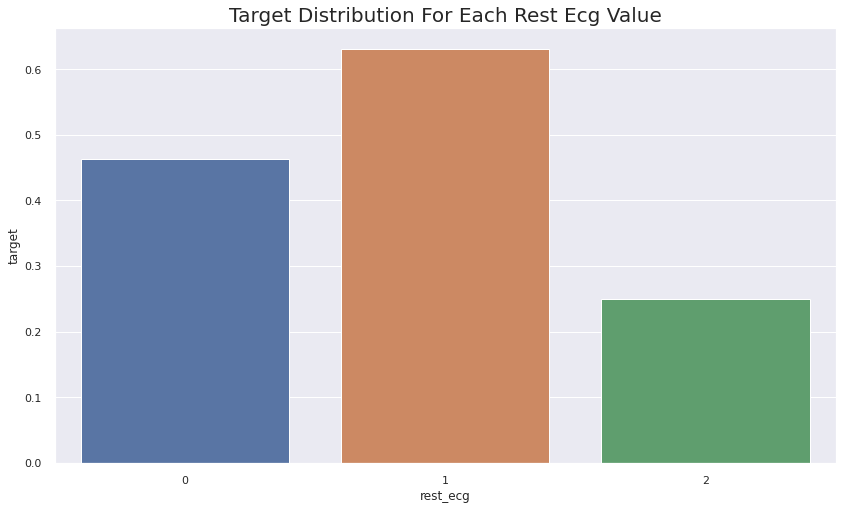

In [9]:
fig, ax = plt.subplots(figsize=(14,8))
sns.set(font_scale=1.5)
sns.barplot(x="rest_ecg", y="target", data=raw_df, ci=None)
ax.set_xlabel('rest_ecg')
ax.set_ylabel('target')
plt.title("target distribution for each rest ECG value".title(), fontsize=20)
plt.show()

Doesnt seem ordinal to me.
Let's one-hot-encode!

### One-Hot-Encoding

In [10]:
from sklearn.preprocessing import OneHotEncoder


df = pd.get_dummies(raw_df, drop_first=True, columns=["chest_pain_type", "rest_ecg", "thalassemia", "st_slope"])

df.describe()

,age,sex,resting_blood_pressure,cholesterol,fasting_blood_sugar,max_heart_rate_achieved,exercise_induced_angina,st_depression,num_major_vessels,target,chest_pain_type_1,chest_pain_type_2,chest_pain_type_3,rest_ecg_1,rest_ecg_2,thalassemia_1,thalassemia_2,thalassemia_3,st_slope_1,st_slope_2
count,303.0000,303.0000,303.0000,303.0000,303.0000,303.0000,303.0000,303.0000,303.0000,303.0000,303.0000,303.0000,303.0000,303.0000,303.0000,303.0000,303.0000,303.0000,303.0000,303.0000
mean,54.3663,0.6832,131.6238,246.2640,0.1485,149.6469,0.3267,1.0396,0.7294,0.5446,0.1650,0.2871,0.0759,0.5017,0.0132,0.0594,0.5479,0.3861,0.4620,0.4686
std,9.0821,0.4660,17.5381,51.8308,0.3562,22.9052,0.4698,1.1611,1.0226,0.4988,0.3718,0.4532,0.2653,0.5008,0.1143,0.2368,0.4985,0.4877,0.4994,0.4998
min,29.0000,0.0000,94.0000,126.0000,0.0000,71.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
25%,47.5000,0.0000,120.0000,211.0000,0.0000,133.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
50%,55.0000,1.0000,130.0000,240.0000,0.0000,153.0000,0.0000,0.8000,0.0000,1.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000
75%,61.0000,1.0000,140.0000,274.5000,0.0000,166.0000,1.0000,1.6000,1.0000,1.0000,0.0000,1.0000,0.0000,1.0000,0.0000,0.0000,1.0000,1.0000,1.0000,1.0000
max,77.0000,1.0000,200.0000,564.0000,1.0000,202.0000,1.0000,6.2000,4.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


### Outliers

Since the dataset is not big, outliers will have a significant impact. Let's boxlot some outlier suspected columns

Reminder: the box is 25th-75th percentiles (aka IQR). The bottom and top lines are defined by: 
</br>
top: 75th percentile + 1.5 * IQR
</br>
bottom:25th percentile - 1.5 * IQR


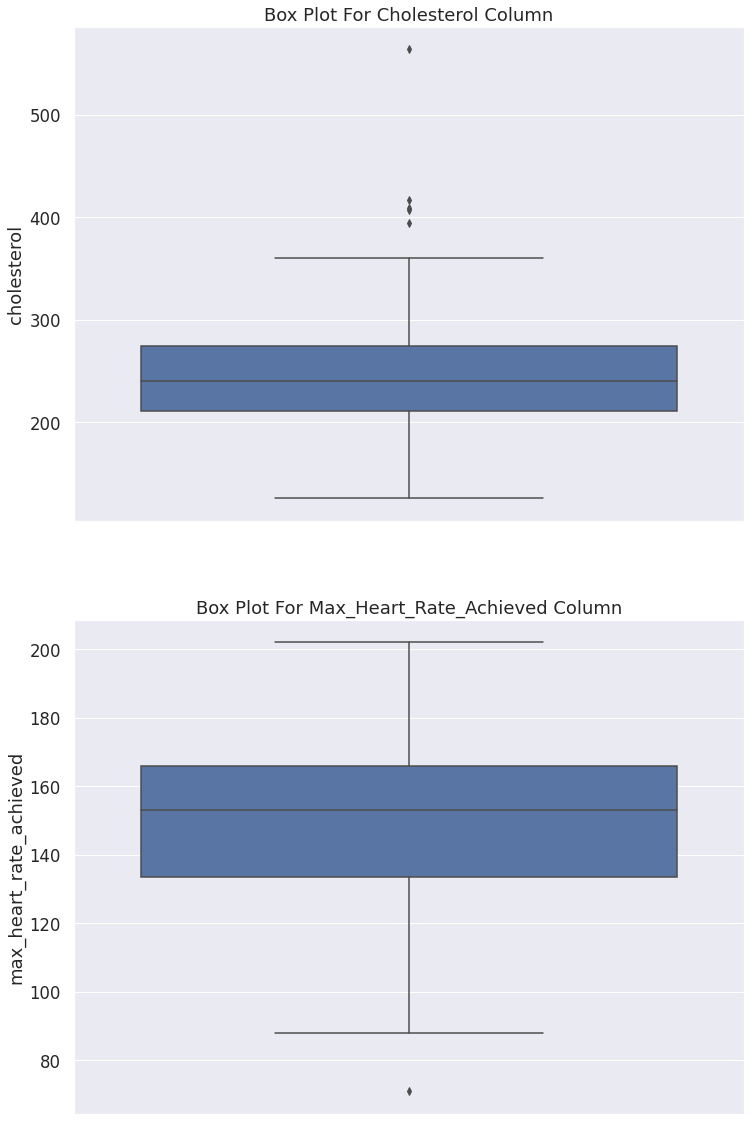

In [11]:
cols_to_box_plot = ["cholesterol", "max_heart_rate_achieved"]

fig, ax = plt.subplots(len(cols_to_box_plot), 1, figsize=(12, 10*len(cols_to_box_plot)))
for i, col in enumerate(cols_to_box_plot):
    sns.boxplot(y=col, data=df, ax=ax[i])
    ax[i].set_title(f"Box Plot for {col} column".title())
    print()


Let's remove the outliers

In [12]:
def remove_outliers(df, col_names, how="IQR", what_to_do="drop"):
    for col_name in col_names:
        Q1 = df[col_name].quantile(0.25)
        Q3 = df[col_name].quantile(0.75)
        IQR = Q3 - Q1  # IQR is interquartile range. 

        filter1 = (df[col_name] >= Q1 - 1.5 * IQR) & (df[col_name] <= Q3 + 1.5 *IQR)

        if what_to_do == "drop":
            df = df[filter1]

        if what_to_do == "median":
            df.loc[filter1, col_name] = df.col_name.median()

        if what_to_do == "mean":
            df.loc[filter1, col_name] = df.col_name.mean()
        break
        
    return df

In [13]:
df_with_outliers = df.copy()  # to keep track of whether or not the ouliers removal improved models. And if so, which.
df = remove_outliers(df, ["cholesterol", "max_heart_rate_achieved"])
df

,age,sex,resting_blood_pressure,cholesterol,fasting_blood_sugar,max_heart_rate_achieved,exercise_induced_angina,st_depression,num_major_vessels,target,chest_pain_type_1,chest_pain_type_2,chest_pain_type_3,rest_ecg_1,rest_ecg_2,thalassemia_1,thalassemia_2,thalassemia_3,st_slope_1,st_slope_2
0,63,1,145,233,1,150,0,2.3000,0,1,0,0,1,0,0,1,0,0,0,0
1,37,1,130,250,0,187,0,3.5000,0,1,0,1,0,1,0,0,1,0,0,0
2,41,0,130,204,0,172,0,1.4000,0,1,1,0,0,0,0,0,1,0,0,1
3,56,1,120,236,0,178,0,0.8000,0,1,1,0,0,1,0,0,1,0,0,1
4,57,0,120,354,0,163,1,0.6000,0,1,0,0,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,140,241,0,123,1,0.2000,0,0,0,0,0,1,0,0,0,1,1,0
299,45,1,110,264,0,132,0,1.2000,0,0,0,0,1,1,0,0,0,1,1,0
300,68,1,144,193,1,141,0,3.4000,2,0,0,0,0,1,0,0,0,1,1,0
301,57,1,130,131,0,115,1,1.2000,1,0,0,0,0,1,0,0,0,1,1,0


check for NAs

In [14]:
df.isna().any()

age                        False
sex                        False
resting_blood_pressure     False
cholesterol                False
fasting_blood_sugar        False
max_heart_rate_achieved    False
exercise_induced_angina    False
st_depression              False
num_major_vessels          False
target                     False
chest_pain_type_1          False
chest_pain_type_2          False
chest_pain_type_3          False
rest_ecg_1                 False
rest_ecg_2                 False
thalassemia_1              False
thalassemia_2              False
thalassemia_3              False
st_slope_1                 False
st_slope_2                 False
dtype: bool

Great! no NAs at all                     

Let's explore some more

In [15]:
df.target.value_counts()

1    162
0    136
Name: target, dtype: int64

It's well known that older people tend to have higher possibilty for heart disease, I wonder in what age does this start to reflect, and by how much. Let's check

Let's create a temp df with one-hot-encoding, without throwing the first categorical value, </br>
to better understand the corrleation matrix


In [16]:
temp_df = pd.get_dummies(raw_df, drop_first=False, columns=["chest_pain_type", "rest_ecg", "thalassemia", "st_slope"])


### Correlations

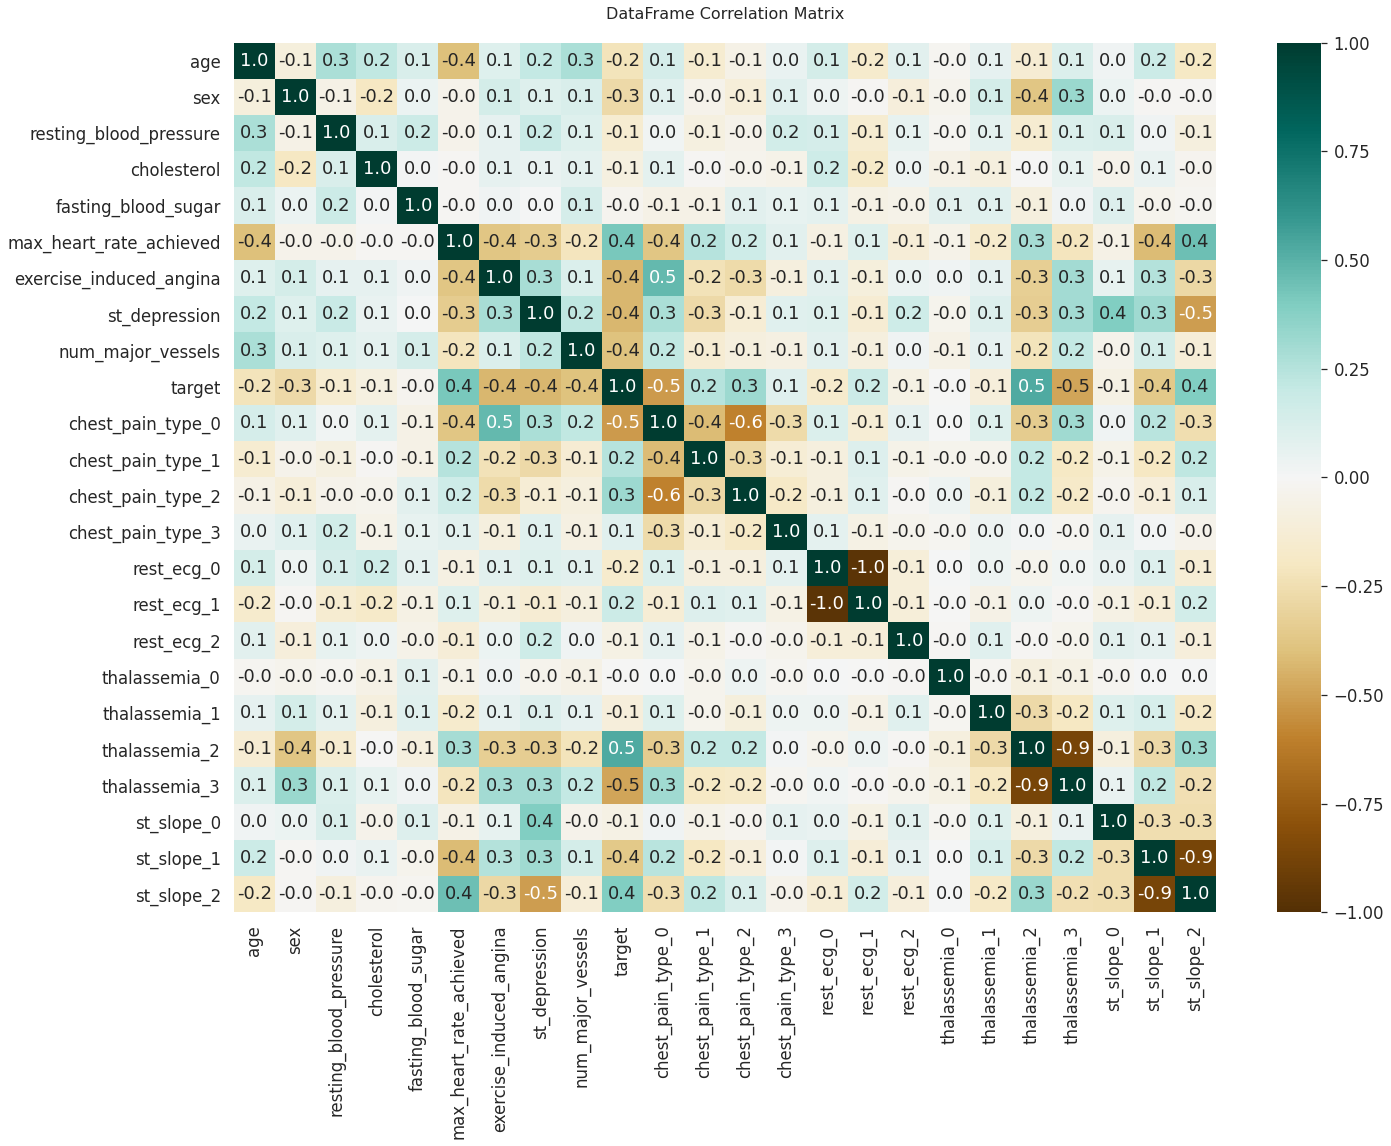

In [17]:
plt.figure(figsize=(22, 16))
sns.heatmap(temp_df.corr(), annot=True, fmt='.1f', cmap='BrBG', vmax=1, vmin=-1)
plt.title("DataFrame Correlation Matrix\n", fontsize=16)
plt.show()

It doesn't seem there's a strong Multicollinearity in the data. </br>
Perhaps st_slope and st_depression (0.6) are strognly correlated and hence, worth considiration in terms of whether or not to remove one of them.

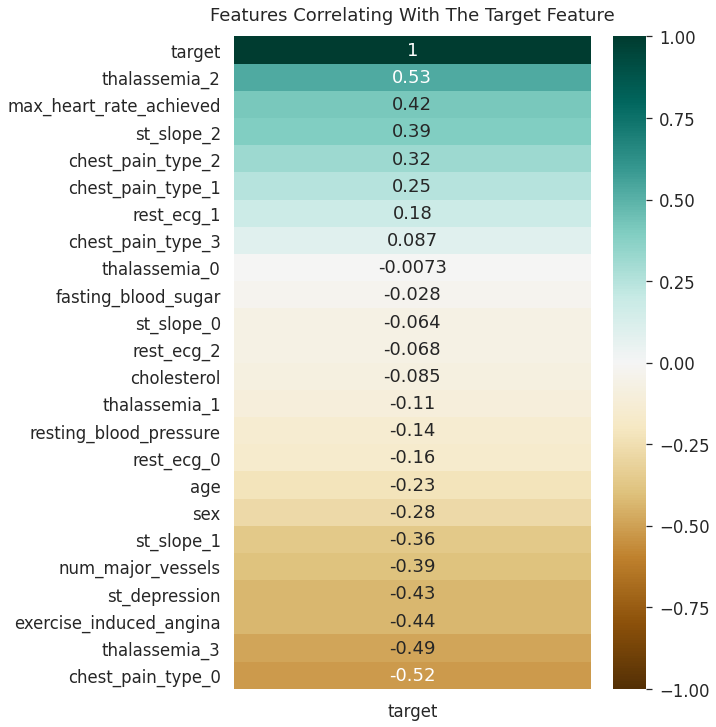

In [18]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(temp_df.corr()[['target']].sort_values(by='target', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with the Target feature'.title(), fontdict={'fontsize': 18}, pad=16);

## Feature Engineering

In [19]:
df["age_sq"] = df.age ** 2
df["age_sex"] = df.age * df.sex

# Feature Scalling

We'll try both Normalization & standadization, and see which one performes better.

## Standardization

Standardization: Will scale the input to have mean of 0 and variance of 1. $$X_{stand} = \frac{X - \mu}{\sigma}$$


In [20]:
from sklearn.preprocessing import StandardScaler 

desc_df = df.describe()
cols = [col for col in df.columns if desc_df[col]["max"] != 1.0]  # if the max is 1, then it's a dummy var (I checked)

scaler = StandardScaler()

stndrd_df = df.copy()
stndrd_df[cols] = scaler.fit_transform(df[cols])

stndrd_df.describe()

,age,sex,resting_blood_pressure,cholesterol,fasting_blood_sugar,max_heart_rate_achieved,exercise_induced_angina,st_depression,num_major_vessels,target,chest_pain_type_1,chest_pain_type_2,chest_pain_type_3,rest_ecg_1,rest_ecg_2,thalassemia_1,thalassemia_2,thalassemia_3,st_slope_1,st_slope_2,age_sq,age_sex
count,298.0000,298.0000,298.0000,298.0000,298.0000,298.0000,298.0000,298.0000,298.0000,298.0000,298.0000,298.0000,298.0000,298.0000,298.0000,298.0000,298.0000,298.0000,298.0000,298.0000,298.0000,298.0000
mean,-0.0000,0.6946,0.0000,-0.0000,0.1477,-0.0000,0.3289,-0.0000,0.0000,0.5436,0.1678,0.2852,0.0772,0.5101,0.0134,0.0604,0.5503,0.3826,0.4564,0.4732,-0.0000,0.0000
std,1.0017,0.4613,1.0017,1.0017,0.3554,1.0017,0.4706,1.0017,1.0017,0.4989,0.3743,0.4523,0.2673,0.5007,0.1153,0.2386,0.4983,0.4868,0.4989,0.5001,1.0017,1.0017
min,-2.7825,0.0000,-2.1358,-2.5999,0.0000,-3.4090,0.0000,-0.8880,-0.7098,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,-2.2411,-1.4453
25%,-0.7972,0.0000,-0.6571,-0.7118,0.0000,-0.7182,0.0000,-0.8880,-0.7098,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,-0.8360,-1.4453
50%,0.0851,1.0000,-0.0884,-0.0676,0.0000,0.1065,0.0000,-0.3250,-0.7098,1.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0022,0.4125
75%,0.7193,1.0000,0.4804,0.6654,0.0000,0.7466,1.0000,0.4979,0.2740,1.0000,0.0000,1.0000,0.0000,1.0000,0.0000,0.0000,1.0000,1.0000,1.0000,1.0000,0.6860,0.7995
max,2.5116,1.0000,3.8928,2.5979,1.0000,2.2765,1.0000,4.4825,3.2255,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,2.9849,1.5349


## Normalization

Min Max Scaling: Will scale the input to have minimum of 0 and maximum of 1. </br> That is, it scales the data in the range of [0, 1] This is useful when the parameters have to be on same positive scale. But in this case, the outliers are lost. $$X_{norm} = \frac{X - X_{min}}{X_{max} - X_{min}}$$

In [21]:
from sklearn.preprocessing import MinMaxScaler


cols = df.columns
scaler = MinMaxScaler()
norm_df = df.copy()
norm_df[cols] = scaler.fit_transform(df[cols])

norm_df.describe()

,age,sex,resting_blood_pressure,cholesterol,fasting_blood_sugar,max_heart_rate_achieved,exercise_induced_angina,st_depression,num_major_vessels,target,chest_pain_type_1,chest_pain_type_2,chest_pain_type_3,rest_ecg_1,rest_ecg_2,thalassemia_1,thalassemia_2,thalassemia_3,st_slope_1,st_slope_2,age_sq,age_sex
count,298.0000,298.0000,298.0000,298.0000,298.0000,298.0000,298.0000,298.0000,298.0000,298.0000,298.0000,298.0000,298.0000,298.0000,298.0000,298.0000,298.0000,298.0000,298.0000,298.0000,298.0000,298.0000
mean,0.5256,0.6946,0.3543,0.5002,0.1477,0.5996,0.3289,0.1653,0.1804,0.5436,0.1678,0.2852,0.0772,0.5101,0.0134,0.0604,0.5503,0.3826,0.4564,0.4732,0.4288,0.4850
std,0.1892,0.4613,0.1662,0.1927,0.3554,0.1762,0.4706,0.1865,0.2545,0.4989,0.3743,0.4523,0.2673,0.5007,0.1153,0.2386,0.4983,0.4868,0.4989,0.5001,0.1917,0.3361
min,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
25%,0.3750,0.0000,0.2453,0.3632,0.0000,0.4733,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.2689,0.0000
50%,0.5417,1.0000,0.3396,0.4872,0.0000,0.6183,0.0000,0.1048,0.0000,1.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.4292,0.6234
75%,0.6615,1.0000,0.4340,0.6282,0.0000,0.7309,1.0000,0.2581,0.2500,1.0000,0.0000,1.0000,0.0000,1.0000,0.0000,0.0000,1.0000,1.0000,1.0000,1.0000,0.5601,0.7532
max,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


## Dummy df (for Bernoulli Naive bayes)

In [22]:
from sklearn.preprocessing import OrdinalEncoder


continues_cols = ["age", "age_sex", "age_sq", "resting_blood_pressure", "cholesterol", "max_heart_rate_achieved", "st_depression"]
category_cols = ["num_major_vessels"]
dummy_cols = [col for col in df.columns if col not in continues_cols + category_cols + ["target"]]

dummy_df = df.copy()

dummy_df = pd.get_dummies(dummy_df, drop_first=True, columns=category_cols)

for col in continues_cols:
    try:
        dummy_df[col] = pd.qcut(dummy_df[col], 3, labels=[1, 2, 3], duplicates='drop')
    except ValueError as e:
        print(col, e, sep="\n")
        dummy_df[col] = pd.qcut(dummy_df[col], q=[0.1, 0.5, 0.8], labels=[1, 2], duplicates='drop')

enc = OrdinalEncoder()
dummy_df_ = enc.fit_transform(dummy_df)

dummy_df = pd.DataFrame(dummy_df_, columns=dummy_df.columns)
dummy_df = pd.get_dummies(dummy_df, drop_first=True, columns=continues_cols)


[col for col in dummy_df.columns if max(dummy_df[col]) != 1.0]  # make sure all cols are binary

[]

# ML models

## First, Benchmark

The benchmark would be the most common label in the train set

In [23]:
counts = df.target.value_counts(dropna=False)
counts

1    162
0    136
Name: target, dtype: int64

The dataset is balanced, so it'll probably be easy to get better accuracy than the beanchmark.

In [24]:
from sklearn.metrics import f1_score 


acc = len(df[df.target==counts.sort_values(ascending=False).index[0]])/len(df)
pred = np.ones(len(df))
f1 = f1_score(df.target, pred)

print('Beanchmark Accuracy:', acc)
print('Beanchmark F1:', f1) # it'll be 0..

Beanchmark Accuracy: 0.5436241610738255
Beanchmark F1: 0.7043478260869566


#### Let's create some variables and dfs that will help with the help functions

In [25]:
dfs = {"Normalized_df": norm_df, "Standadized_df": stndrd_df, "not_scaled_df": df, "not_scaled_with_outliers_df": df_with_outliers}
dfs_w_dummy = {"Normalized_df": norm_df, "Standadized_df": stndrd_df, "not_scaled_df": df, "not_scaled_with_outliers_df": df_with_outliers, "dummy_df": dummy_df}  
# perhaps I won't want to try all models with dummy as well. It's mainly for NB

target_var = "target"

evaluations = ["avg_test_accuracy", "avg_test_f1"]

index = [
    np.repeat(list(dfs_w_dummy.keys()), len(evaluations)),
    evaluations * len(dfs_w_dummy)
        ]

beanchmark_vals = np.array([acc, f1])
beanchmark_vals = np.tile(beanchmark_vals, len(dfs_w_dummy))

evaluation_df = pd.DataFrame(index=index)
evaluation_df["beanchmark"] = beanchmark_vals

evaluation_df

beanchmark
Normalized_df               avg_test_accuracy      0.5436
                            avg_test_f1            0.7043
Standadized_df              avg_test_accuracy      0.5436
                            avg_test_f1            0.7043
not_scaled_df               avg_test_accuracy      0.5436
                            avg_test_f1            0.7043
not_scaled_with_outliers_df avg_test_accuracy      0.5436
                            avg_test_f1            0.7043
dummy_df                    avg_test_accuracy      0.5436
                            avg_test_f1            0.7043

### Helper function, to evaluate a model

In [26]:
from numpy import mean
from numpy import std
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate



def evaluate(classifier, dfs=dfs, k=4):
    """
    Description: Given a classifier, list of dataframes and k, computes the accuracy and f1 scores with KFOLD, and stores it in evaluation_df for further analysis and comparison.
    params:
    classifier: classifier object
    dfs: list of dataframes. The rational for more than 1 df, is in case you'll want to compare different preprocessed datasets, such as: different features, saclling, etc.
    k: number of k in KFOLD
    returns: a DataFrame object
    """
    clf_name = classifier.__class__.__name__
    print(f"For model: {clf_name}")
    
    for i, df_item in enumerate(dfs.items()):
        df_name = df_item[0]
        df_ = df_item[1]
        
        X = df_.loc[:, df_.columns != target_var]

        y = df_[target_var]
        
        scores = cross_validate(classifier, X, y, cv=k, scoring=('accuracy', 'f1'), return_train_score=True)
        avg_test_accuracy = scores['test_accuracy'].mean()
        avg_test_f1 = scores['test_f1'].mean()
        
        print(f"\nfor dataframe {df_name}:")
        print(f"{avg_test_accuracy:.3f} accuracy with a standard deviation of {scores['test_accuracy'].std():.3f}")
        print(f"{avg_test_f1:.3f} f1 with a standard deviation of {scores['test_f1'].std():.3f}")
        print("Train accuracy:", scores["train_accuracy"])
        print((df_name, evaluations), clf_name)
        evaluation_df.loc[(df_name, evaluations), clf_name] =  [avg_test_accuracy, avg_test_f1]

    
    print("\n")
    
    return evaluation_df



### Helper function, to perform a grid search

In [27]:
from sklearn.model_selection import GridSearchCV


def grid_search(model, grid: dict, dfs=dfs, k=4, to_print=True):
    """
    Description: Performing a GridSearch given model, dfs and paramters
    params:
    model: model object that is working with GridSearchCV
    grid: a dict object(we can iterate over it: list, tuple, numpy array) grid which has param name and param values
    dfs: list of dataframes. The rational for more than 1 df, is in case you'll want to compare different preprocessed datasets, such as: different features, saclling, etc.
    k: number of k in KFOLD
    returns: a dict object, best_params ***on one of the given datasets (if its performed way better than others, we'll see it in evaluation_df)***
    """
    max_acc = -1
    for df_name, df_ in dfs.items():
        X = df_.loc[:, df_.columns != target_var]
        y = df_[target_var]

        grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=k, scoring='accuracy',error_score=0)
        grid_result = grid_search.fit(X, y)
    
        print(f"\nFor {df_name}:")
        print("Best: %.3f using %s" % (grid_result.best_score_, grid_result.best_params_))
        
        if grid_result.best_score_ > max_acc: # if this accuracy is higher than the last one, then change the best_params to this one and the max_acc var
            best_params = grid_result.best_params_ 
            max_acc = grid_result.best_score_
            
        means = grid_result.cv_results_['mean_test_score']
        stds = grid_result.cv_results_['std_test_score']
        params = grid_result.cv_results_['params']
        
        if to_print == True:
            for mean, stdev, param in zip(means, stds, params):
                print("%.3f (%.3f) with: %r" % (mean, stdev, param))
        
    return best_params # NOTE: That's returning the best performed params, that performed best on a given dataset

# Naive Bayes

### There are deifferent kinds of naive bayes classifiers. </br>
all bayes classifiers obey to this equation: p(y | x1; x2...; xn) = p (x1; x2...; xn | y) * p(y) / p(x).  </br>
* Multinomial - the most common one, assumes discrete features. simple conditional probability with the probability being simply the frequency of each feature in each class.  </br>
* Gaussian - assumes the likelihood probabilities follow Gaussian distribution.  </br>
* Bernoully - assumes bernoully distribution of the features(binary).
* Categorical - assumes features are categorical

For the Bernoully naive bayes, we need to binarize values, so we will only use the standardized df(has both negative and positive values, approx in the 50 percentile) with different binarize values (ex: binarize=0 is to cut it to approx half 0 and half 1). 

In [28]:
stndrd_df.describe()

,age,sex,resting_blood_pressure,cholesterol,fasting_blood_sugar,max_heart_rate_achieved,exercise_induced_angina,st_depression,num_major_vessels,target,chest_pain_type_1,chest_pain_type_2,chest_pain_type_3,rest_ecg_1,rest_ecg_2,thalassemia_1,thalassemia_2,thalassemia_3,st_slope_1,st_slope_2,age_sq,age_sex
count,298.0000,298.0000,298.0000,298.0000,298.0000,298.0000,298.0000,298.0000,298.0000,298.0000,298.0000,298.0000,298.0000,298.0000,298.0000,298.0000,298.0000,298.0000,298.0000,298.0000,298.0000,298.0000
mean,-0.0000,0.6946,0.0000,-0.0000,0.1477,-0.0000,0.3289,-0.0000,0.0000,0.5436,0.1678,0.2852,0.0772,0.5101,0.0134,0.0604,0.5503,0.3826,0.4564,0.4732,-0.0000,0.0000
std,1.0017,0.4613,1.0017,1.0017,0.3554,1.0017,0.4706,1.0017,1.0017,0.4989,0.3743,0.4523,0.2673,0.5007,0.1153,0.2386,0.4983,0.4868,0.4989,0.5001,1.0017,1.0017
min,-2.7825,0.0000,-2.1358,-2.5999,0.0000,-3.4090,0.0000,-0.8880,-0.7098,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,-2.2411,-1.4453
25%,-0.7972,0.0000,-0.6571,-0.7118,0.0000,-0.7182,0.0000,-0.8880,-0.7098,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,-0.8360,-1.4453
50%,0.0851,1.0000,-0.0884,-0.0676,0.0000,0.1065,0.0000,-0.3250,-0.7098,1.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0022,0.4125
75%,0.7193,1.0000,0.4804,0.6654,0.0000,0.7466,1.0000,0.4979,0.2740,1.0000,0.0000,1.0000,0.0000,1.0000,0.0000,0.0000,1.0000,1.0000,1.0000,1.0000,0.6860,0.7995
max,2.5116,1.0000,3.8928,2.5979,1.0000,2.2765,1.0000,4.4825,3.2255,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,2.9849,1.5349


In [29]:
%%time

from sklearn.naive_bayes import BernoulliNB


binarize = [-0.5, 0, 0.5]
standard_dfs = {"Standadized_df": stndrd_df}
grid = dict(binarize=binarize)
model = BernoulliNB()
best_params = grid_search(model, grid, to_print=False, dfs=dfs_w_dummy)


##########################################################################################


model = BernoulliNB(**best_params)

evaluate(model, k=4, dfs=dfs_w_dummy)


For Normalized_df:
Best: 0.809 using {'binarize': 0}

For Standadized_df:
Best: 0.822 using {'binarize': 0.5}

For not_scaled_df:
Best: 0.812 using {'binarize': 0.5}

For not_scaled_with_outliers_df:
Best: 0.825 using {'binarize': 0.5}

For dummy_df:
Best: 0.825 using {'binarize': 0}
For model: BernoulliNB

for dataframe Normalized_df:
0.809 accuracy with a standard deviation of 0.039
0.821 f1 with a standard deviation of 0.036
Train accuracy: [0.834081 0.816143 0.839286 0.825893]
('Normalized_df', ['avg_test_accuracy', 'avg_test_f1']) BernoulliNB

for dataframe Standadized_df:
0.798 accuracy with a standard deviation of 0.048
0.815 f1 with a standard deviation of 0.042
Train accuracy: [0.843049 0.807175 0.839286 0.843750]
('Standadized_df', ['avg_test_accuracy', 'avg_test_f1']) BernoulliNB

for dataframe not_scaled_df:
0.809 accuracy with a standard deviation of 0.039
0.821 f1 with a standard deviation of 0.036
Train accuracy: [0.829596 0.807175 0.839286 0.830357]
('not_scaled_df', [

beanchmark  BernoulliNB
Normalized_df               avg_test_accuracy      0.5436       0.8086
                            avg_test_f1            0.7043       0.8211
Standadized_df              avg_test_accuracy      0.5436       0.7985
                            avg_test_f1            0.7043       0.8154
not_scaled_df               avg_test_accuracy      0.5436       0.8086
                            avg_test_f1            0.7043       0.8211
not_scaled_with_outliers_df avg_test_accuracy      0.5436       0.8152
                            avg_test_f1            0.7043       0.8279
dummy_df                    avg_test_accuracy      0.5436       0.8253
                            avg_test_f1            0.7043       0.8353

Makes sense that BernoulliNB will work best on the standardized df(with binary=0 or close to it). </br> However, it doesn't seem siginificant, which probably means that the already-binary(those the model didn't binarize) features has the most impact on the model.

Now, let's try with the dummy df (binarize paramter in BernoulliNB makes it 2 categories features). </br>
Note: BernoulliNB on standadized df is only 2 categories while the dummy df has 3 categories for the continues values. it shouldn't behave too different.</br>
Let's see if it's better that way. </br>

In [30]:
from sklearn.naive_bayes import GaussianNB


model = GaussianNB()

evaluate(model, k=4, dfs=dfs_w_dummy)

For model: GaussianNB

for dataframe Normalized_df:
0.792 accuracy with a standard deviation of 0.062
0.817 f1 with a standard deviation of 0.037
Train accuracy: [0.843049 0.838565 0.843750 0.758929]
('Normalized_df', ['avg_test_accuracy', 'avg_test_f1']) GaussianNB

for dataframe Standadized_df:
0.792 accuracy with a standard deviation of 0.062
0.817 f1 with a standard deviation of 0.037
Train accuracy: [0.843049 0.838565 0.843750 0.767857]
('Standadized_df', ['avg_test_accuracy', 'avg_test_f1']) GaussianNB

for dataframe not_scaled_df:
0.815 accuracy with a standard deviation of 0.031
0.830 f1 with a standard deviation of 0.024
Train accuracy: [0.843049 0.834081 0.848214 0.848214]
('not_scaled_df', ['avg_test_accuracy', 'avg_test_f1']) GaussianNB

for dataframe not_scaled_with_outliers_df:
0.798 accuracy with a standard deviation of 0.050
0.820 f1 with a standard deviation of 0.039
Train accuracy: [0.832599 0.837004 0.850220 0.820175]
('not_scaled_with_outliers_df', ['avg_test_accura

beanchmark  BernoulliNB  \
Normalized_df               avg_test_accuracy      0.5436       0.8086   
                            avg_test_f1            0.7043       0.8211   
Standadized_df              avg_test_accuracy      0.5436       0.7985   
                            avg_test_f1            0.7043       0.8154   
not_scaled_df               avg_test_accuracy      0.5436       0.8086   
                            avg_test_f1            0.7043       0.8211   
not_scaled_with_outliers_df avg_test_accuracy      0.5436       0.8152   
                            avg_test_f1            0.7043       0.8279   
dummy_df                    avg_test_accuracy      0.5436       0.8253   
                            avg_test_f1            0.7043       0.8353   

                                               GaussianNB  
Normalized_df               avg_test_accuracy      0.7917  
                            avg_test_f1            0.8171  
Standadized_df              avg_test_accuracy      0.7917  
                            avg_test_f1            0.8171  
not_scaled_df               avg_test_accuracy      0.8153  
                            avg_test_f1            0.8303  
not_scaled_with_outliers_df avg_test_accuracy      0.7985  
                            avg_test_f1            0.8199  
dummy_df                    avg_test_accuracy      0.7275  
                            avg_test_f1            0.7121

Note to self: no need for categorical NB because bernoully NB takes its place.
</br>
Also, multinominal is not relavent beacuse it's not suited for both continues and binary data. It needs discrite values.

# Logistic regression

In [31]:
%%time

from sklearn.linear_model import LogisticRegression


model = LogisticRegression()

solvers = ['newton-cg', 'liblinear']
penalty = ['l1', 'l2']
c_values = (0.1, 1, 2, 5, 10, 20, 30, 40, 50)
n_jobs = [-1]

grid = dict(solver=solvers, penalty=penalty, C=c_values)

best_params = grid_search(model, grid, to_print=False)


For Normalized_df:
Best: 0.832 using {'C': 20, 'penalty': 'l2', 'solver': 'liblinear'}

For Standadized_df:
Best: 0.835 using {'C': 20, 'penalty': 'l2', 'solver': 'liblinear'}


/opt/conda/lib/python3.7/site-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/opt/conda/lib/python3.7/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)



For not_scaled_df:
Best: 0.839 using {'C': 1, 'penalty': 'l2', 'solver': 'newton-cg'}

For not_scaled_with_outliers_df:
Best: 0.838 using {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}
CPU times: user 2.07 s, sys: 49.5 ms, total: 2.12 s
Wall time: 6.99 s


In [32]:
%%time


model = LogisticRegression(**best_params)

evaluate(model, k=4, dfs=dfs_w_dummy)

For model: LogisticRegression

for dataframe Normalized_df:
0.812 accuracy with a standard deviation of 0.032
0.829 f1 with a standard deviation of 0.027
Train accuracy: [0.847534 0.829596 0.866071 0.870536]
('Normalized_df', ['avg_test_accuracy', 'avg_test_f1']) LogisticRegression

for dataframe Standadized_df:
0.832 accuracy with a standard deviation of 0.041
0.850 f1 with a standard deviation of 0.035
Train accuracy: [0.847534 0.852018 0.870536 0.879464]
('Standadized_df', ['avg_test_accuracy', 'avg_test_f1']) LogisticRegression


/opt/conda/lib/python3.7/site-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/opt/conda/lib/python3.7/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)



for dataframe not_scaled_df:
0.839 accuracy with a standard deviation of 0.039
0.857 f1 with a standard deviation of 0.031
Train accuracy: [0.852018 0.856502 0.861607 0.883929]
('not_scaled_df', ['avg_test_accuracy', 'avg_test_f1']) LogisticRegression

for dataframe not_scaled_with_outliers_df:
0.828 accuracy with a standard deviation of 0.033
0.847 f1 with a standard deviation of 0.031
Train accuracy: [0.859031 0.850220 0.876652 0.894737]
('not_scaled_with_outliers_df', ['avg_test_accuracy', 'avg_test_f1']) LogisticRegression

for dataframe dummy_df:
0.812 accuracy with a standard deviation of 0.057
0.830 f1 with a standard deviation of 0.050
Train accuracy: [0.852018 0.852018 0.879464 0.888393]
('dummy_df', ['avg_test_accuracy', 'avg_test_f1']) LogisticRegression


CPU times: user 1.07 s, sys: 4.05 ms, total: 1.08 s
Wall time: 1.07 s


beanchmark  BernoulliNB  \
Normalized_df               avg_test_accuracy      0.5436       0.8086   
                            avg_test_f1            0.7043       0.8211   
Standadized_df              avg_test_accuracy      0.5436       0.7985   
                            avg_test_f1            0.7043       0.8154   
not_scaled_df               avg_test_accuracy      0.5436       0.8086   
                            avg_test_f1            0.7043       0.8211   
not_scaled_with_outliers_df avg_test_accuracy      0.5436       0.8152   
                            avg_test_f1            0.7043       0.8279   
dummy_df                    avg_test_accuracy      0.5436       0.8253   
                            avg_test_f1            0.7043       0.8353   

                                               GaussianNB  LogisticRegression  
Normalized_df               avg_test_accuracy      0.7917              0.8120  
                            avg_test_f1            0.8171              0.8294  
Standadized_df              avg_test_accuracy      0.7917              0.8320  
                            avg_test_f1            0.8171              0.8495  
not_scaled_df               avg_test_accuracy      0.8153              0.8387  
                            avg_test_f1            0.8303              0.8569  
not_scaled_with_outliers_df avg_test_accuracy      0.7985              0.8283  
                            avg_test_f1            0.8199              0.8466  
dummy_df                    avg_test_accuracy      0.7275              0.8117  
                            avg_test_f1            0.7121              0.8299

# Support Vector Machines

In [33]:
%%time

from sklearn.svm import SVC


model = SVC()

kernel = ['poly', 'rbf', 'sigmoid']
C = np.linspace(0.1, 20, 4)
degree = [2, 3]
coef0 = [1, 5]

grid = dict(kernel=kernel, C=C, degree=degree, coef0=coef0)

best_params = grid_search(model, grid, to_print=False)


For Normalized_df:
Best: 0.812 using {'C': 6.7333333333333325, 'coef0': 1, 'degree': 3, 'kernel': 'poly'}

For Standadized_df:
Best: 0.819 using {'C': 0.1, 'coef0': 1, 'degree': 2, 'kernel': 'poly'}

For not_scaled_df:
Best: 0.725 using {'C': 20.0, 'coef0': 5, 'degree': 3, 'kernel': 'poly'}

For not_scaled_with_outliers_df:
Best: 0.831 using {'C': 20.0, 'coef0': 5, 'degree': 3, 'kernel': 'poly'}
CPU times: user 1.8 s, sys: 41.4 ms, total: 1.84 s
Wall time: 3.78 s


In [34]:
%%time


model = SVC(**best_params)

evaluate(model, k=4)

For model: SVC

for dataframe Normalized_df:
0.788 accuracy with a standard deviation of 0.049
0.807 f1 with a standard deviation of 0.048
Train accuracy: [1.000000 1.000000 1.000000 1.000000]
('Normalized_df', ['avg_test_accuracy', 'avg_test_f1']) SVC

for dataframe Standadized_df:
0.755 accuracy with a standard deviation of 0.055
0.780 f1 with a standard deviation of 0.057
Train accuracy: [1.000000 1.000000 1.000000 1.000000]
('Standadized_df', ['avg_test_accuracy', 'avg_test_f1']) SVC

for dataframe not_scaled_df:
0.725 accuracy with a standard deviation of 0.028
0.754 f1 with a standard deviation of 0.029
Train accuracy: [0.753363 0.735426 0.745536 0.772321]
('not_scaled_df', ['avg_test_accuracy', 'avg_test_f1']) SVC

for dataframe not_scaled_with_outliers_df:
0.831 accuracy with a standard deviation of 0.044
0.852 f1 with a standard deviation of 0.036
Train accuracy: [0.828194 0.841410 0.863436 0.864035]
('not_scaled_with_outliers_df', ['avg_test_accuracy', 'avg_test_f1']) SVC


C

beanchmark  BernoulliNB  \
Normalized_df               avg_test_accuracy      0.5436       0.8086   
                            avg_test_f1            0.7043       0.8211   
Standadized_df              avg_test_accuracy      0.5436       0.7985   
                            avg_test_f1            0.7043       0.8154   
not_scaled_df               avg_test_accuracy      0.5436       0.8086   
                            avg_test_f1            0.7043       0.8211   
not_scaled_with_outliers_df avg_test_accuracy      0.5436       0.8152   
                            avg_test_f1            0.7043       0.8279   
dummy_df                    avg_test_accuracy      0.5436       0.8253   
                            avg_test_f1            0.7043       0.8353   

                                               GaussianNB  LogisticRegression  \
Normalized_df               avg_test_accuracy      0.7917              0.8120   
                            avg_test_f1            0.8171              0.8294   
Standadized_df              avg_test_accuracy      0.7917              0.8320   
                            avg_test_f1            0.8171              0.8495   
not_scaled_df               avg_test_accuracy      0.8153              0.8387   
                            avg_test_f1            0.8303              0.8569   
not_scaled_with_outliers_df avg_test_accuracy      0.7985              0.8283   
                            avg_test_f1            0.8199              0.8466   
dummy_df                    avg_test_accuracy      0.7275              0.8117   
                            avg_test_f1            0.7121              0.8299   

                                                 SVC  
Normalized_df               avg_test_accuracy 0.7883  
                            avg_test_f1       0.8068  
Standadized_df              avg_test_accuracy 0.7547  
                            avg_test_f1       0.7800  
not_scaled_df               avg_test_accuracy 0.7248  
                            avg_test_f1       0.7538  
not_scaled_with_outliers_df avg_test_accuracy 0.8315  
                            avg_test_f1       0.8517  
dummy_df                    avg_test_accuracy    NaN  
                            avg_test_f1          NaN

# KNN

In [35]:
%%time

from sklearn.neighbors import KNeighborsClassifier


model = KNeighborsClassifier()

n_neighbors = range(3, 24, 3)
weights = ['uniform', 'distance']
metric = ['minkowski']  # remember that minkowski can be manhattan or euclidean (p=1, p=2, respectively)
p = [1, 2, 3, 4]  # for minkowski


grid = dict(n_neighbors=n_neighbors, weights=weights, metric=metric, p=p, n_jobs=n_jobs)

best_params = grid_search(model, grid)


For Normalized_df:
Best: 0.812 using {'metric': 'minkowski', 'n_jobs': -1, 'n_neighbors': 15, 'p': 1, 'weights': 'distance'}
0.785 (0.041) with: {'metric': 'minkowski', 'n_jobs': -1, 'n_neighbors': 3, 'p': 1, 'weights': 'uniform'}
0.788 (0.036) with: {'metric': 'minkowski', 'n_jobs': -1, 'n_neighbors': 3, 'p': 1, 'weights': 'distance'}
0.768 (0.062) with: {'metric': 'minkowski', 'n_jobs': -1, 'n_neighbors': 3, 'p': 2, 'weights': 'uniform'}
0.772 (0.048) with: {'metric': 'minkowski', 'n_jobs': -1, 'n_neighbors': 3, 'p': 2, 'weights': 'distance'}
0.775 (0.066) with: {'metric': 'minkowski', 'n_jobs': -1, 'n_neighbors': 3, 'p': 3, 'weights': 'uniform'}
0.775 (0.050) with: {'metric': 'minkowski', 'n_jobs': -1, 'n_neighbors': 3, 'p': 3, 'weights': 'distance'}
0.771 (0.073) with: {'metric': 'minkowski', 'n_jobs': -1, 'n_neighbors': 3, 'p': 4, 'weights': 'uniform'}
0.772 (0.056) with: {'metric': 'minkowski', 'n_jobs': -1, 'n_neighbors': 3, 'p': 4, 'weights': 'distance'}
0.795 (0.044) with: {'

In [36]:
%%time


model = KNeighborsClassifier(**best_params)

evaluate(model, k=4)

For model: KNeighborsClassifier

for dataframe Normalized_df:
0.795 accuracy with a standard deviation of 0.044
0.807 f1 with a standard deviation of 0.043
Train accuracy: [0.856502 0.820628 0.825893 0.848214]
('Normalized_df', ['avg_test_accuracy', 'avg_test_f1']) KNeighborsClassifier

for dataframe Standadized_df:
0.832 accuracy with a standard deviation of 0.024
0.841 f1 with a standard deviation of 0.022
Train accuracy: [0.874439 0.843049 0.857143 0.866071]
('Standadized_df', ['avg_test_accuracy', 'avg_test_f1']) KNeighborsClassifier

for dataframe not_scaled_df:
0.570 accuracy with a standard deviation of 0.039
0.564 f1 with a standard deviation of 0.041
Train accuracy: [0.713004 0.739910 0.745536 0.763393]
('not_scaled_df', ['avg_test_accuracy', 'avg_test_f1']) KNeighborsClassifier

for dataframe not_scaled_with_outliers_df:
0.696 accuracy with a standard deviation of 0.017
0.708 f1 with a standard deviation of 0.020
Train accuracy: [0.779736 0.757709 0.823789 0.789474]
('not_sca

beanchmark  BernoulliNB  \
Normalized_df               avg_test_accuracy      0.5436       0.8086   
                            avg_test_f1            0.7043       0.8211   
Standadized_df              avg_test_accuracy      0.5436       0.7985   
                            avg_test_f1            0.7043       0.8154   
not_scaled_df               avg_test_accuracy      0.5436       0.8086   
                            avg_test_f1            0.7043       0.8211   
not_scaled_with_outliers_df avg_test_accuracy      0.5436       0.8152   
                            avg_test_f1            0.7043       0.8279   
dummy_df                    avg_test_accuracy      0.5436       0.8253   
                            avg_test_f1            0.7043       0.8353   

                                               GaussianNB  LogisticRegression  \
Normalized_df               avg_test_accuracy      0.7917              0.8120   
                            avg_test_f1            0.8171              0.8294   
Standadized_df              avg_test_accuracy      0.7917              0.8320   
                            avg_test_f1            0.8171              0.8495   
not_scaled_df               avg_test_accuracy      0.8153              0.8387   
                            avg_test_f1            0.8303              0.8569   
not_scaled_with_outliers_df avg_test_accuracy      0.7985              0.8283   
                            avg_test_f1            0.8199              0.8466   
dummy_df                    avg_test_accuracy      0.7275              0.8117   
                            avg_test_f1            0.7121              0.8299   

                                                 SVC  KNeighborsClassifier  
Normalized_df               avg_test_accuracy 0.7883                0.7951  
                            avg_test_f1       0.8068                0.8072  
Standadized_df              avg_test_accuracy 0.7547                0.8322  
                            avg_test_f1       0.7800                0.8406  
not_scaled_df               avg_test_accuracy 0.7248                0.5702  
                            avg_test_f1       0.7538                0.5642  
not_scaled_with_outliers_df avg_test_accuracy 0.8315                0.6963  
                            avg_test_f1       0.8517                0.7083  
dummy_df                    avg_test_accuracy    NaN                   NaN  
                            avg_test_f1          NaN                   NaN

# Decision Tree

In [37]:
%%time

from sklearn.tree import DecisionTreeClassifier


model = DecisionTreeClassifier()

min_samples_leaf = np.linspace(5, 20, 4).astype(int)
max_depth = [3, 7, 9]


grid = dict(max_depth=max_depth, min_samples_leaf=min_samples_leaf)


best_params = grid_search(model, grid)


For Normalized_df:
Best: 0.799 using {'max_depth': 3, 'min_samples_leaf': 15}
0.765 (0.028) with: {'max_depth': 3, 'min_samples_leaf': 5}
0.782 (0.048) with: {'max_depth': 3, 'min_samples_leaf': 10}
0.799 (0.030) with: {'max_depth': 3, 'min_samples_leaf': 15}
0.758 (0.040) with: {'max_depth': 3, 'min_samples_leaf': 20}
0.728 (0.059) with: {'max_depth': 7, 'min_samples_leaf': 5}
0.775 (0.049) with: {'max_depth': 7, 'min_samples_leaf': 10}
0.799 (0.030) with: {'max_depth': 7, 'min_samples_leaf': 15}
0.758 (0.040) with: {'max_depth': 7, 'min_samples_leaf': 20}
0.728 (0.059) with: {'max_depth': 9, 'min_samples_leaf': 5}
0.775 (0.049) with: {'max_depth': 9, 'min_samples_leaf': 10}
0.799 (0.030) with: {'max_depth': 9, 'min_samples_leaf': 15}
0.758 (0.040) with: {'max_depth': 9, 'min_samples_leaf': 20}

For Standadized_df:
Best: 0.799 using {'max_depth': 3, 'min_samples_leaf': 15}
0.755 (0.021) with: {'max_depth': 3, 'min_samples_leaf': 5}
0.782 (0.048) with: {'max_depth': 3, 'min_samples_le

In [38]:
%%time


model = DecisionTreeClassifier(**best_params)

evaluate(model, k=4, dfs=dfs_w_dummy)

For model: DecisionTreeClassifier

for dataframe Normalized_df:
0.799 accuracy with a standard deviation of 0.030
0.820 f1 with a standard deviation of 0.031
Train accuracy: [0.852018 0.811659 0.830357 0.843750]
('Normalized_df', ['avg_test_accuracy', 'avg_test_f1']) DecisionTreeClassifier

for dataframe Standadized_df:
0.799 accuracy with a standard deviation of 0.030
0.820 f1 with a standard deviation of 0.031
Train accuracy: [0.852018 0.811659 0.830357 0.843750]
('Standadized_df', ['avg_test_accuracy', 'avg_test_f1']) DecisionTreeClassifier

for dataframe not_scaled_df:
0.799 accuracy with a standard deviation of 0.030
0.820 f1 with a standard deviation of 0.031
Train accuracy: [0.852018 0.811659 0.830357 0.843750]
('not_scaled_df', ['avg_test_accuracy', 'avg_test_f1']) DecisionTreeClassifier

for dataframe not_scaled_with_outliers_df:
0.785 accuracy with a standard deviation of 0.044
0.804 f1 with a standard deviation of 0.050
Train accuracy: [0.837004 0.819383 0.854626 0.842105]
(

beanchmark  BernoulliNB  \
Normalized_df               avg_test_accuracy      0.5436       0.8086   
                            avg_test_f1            0.7043       0.8211   
Standadized_df              avg_test_accuracy      0.5436       0.7985   
                            avg_test_f1            0.7043       0.8154   
not_scaled_df               avg_test_accuracy      0.5436       0.8086   
                            avg_test_f1            0.7043       0.8211   
not_scaled_with_outliers_df avg_test_accuracy      0.5436       0.8152   
                            avg_test_f1            0.7043       0.8279   
dummy_df                    avg_test_accuracy      0.5436       0.8253   
                            avg_test_f1            0.7043       0.8353   

                                               GaussianNB  LogisticRegression  \
Normalized_df               avg_test_accuracy      0.7917              0.8120   
                            avg_test_f1            0.8171              0.8294   
Standadized_df              avg_test_accuracy      0.7917              0.8320   
                            avg_test_f1            0.8171              0.8495   
not_scaled_df               avg_test_accuracy      0.8153              0.8387   
                            avg_test_f1            0.8303              0.8569   
not_scaled_with_outliers_df avg_test_accuracy      0.7985              0.8283   
                            avg_test_f1            0.8199              0.8466   
dummy_df                    avg_test_accuracy      0.7275              0.8117   
                            avg_test_f1            0.7121              0.8299   

                                                 SVC  KNeighborsClassifier  \
Normalized_df               avg_test_accuracy 0.7883                0.7951   
                            avg_test_f1       0.8068                0.8072   
Standadized_df              avg_test_accuracy 0.7547                0.8322   
                            avg_test_f1       0.7800                0.8406   
not_scaled_df               avg_test_accuracy 0.7248                0.5702   
                            avg_test_f1       0.7538                0.5642   
not_scaled_with_outliers_df avg_test_accuracy 0.8315                0.6963   
                            avg_test_f1       0.8517                0.7083   
dummy_df                    avg_test_accuracy    NaN                   NaN   
                            avg_test_f1          NaN                   NaN   

                                               DecisionTreeClassifier  
Normalized_df               avg_test_accuracy                  0.7986  
                            avg_test_f1                        0.8197  
Standadized_df              avg_test_accuracy                  0.7986  
                            avg_test_f1                        0.8197  
not_scaled_df               avg_test_accuracy                  0.7986  
                            avg_test_f1                        0.8197  
not_scaled_with_outliers_df avg_test_accuracy                  0.7854  
                            avg_test_f1                        0.8043  
dummy_df                    avg_test_accuracy                  0.7514  
                            avg_test_f1                        0.7690

# Random Forest

In [39]:
%%time

from sklearn.ensemble import RandomForestClassifier


model = RandomForestClassifier()


n_estimators = [10, 100, 500, 1000]
min_samples_leaf = np.linspace(5, 20, 4).astype(int)
max_depth = [3, 7, 9]


grid = dict(n_estimators=n_estimators, max_depth=max_depth, min_samples_leaf=min_samples_leaf)


best_params = grid_search(model, grid, to_print=False)


For Normalized_df:
Best: 0.822 using {'max_depth': 9, 'min_samples_leaf': 20, 'n_estimators': 100}

For Standadized_df:
Best: 0.825 using {'max_depth': 3, 'min_samples_leaf': 5, 'n_estimators': 10}

For not_scaled_df:
Best: 0.822 using {'max_depth': 9, 'min_samples_leaf': 10, 'n_estimators': 100}

For not_scaled_with_outliers_df:
Best: 0.835 using {'max_depth': 9, 'min_samples_leaf': 20, 'n_estimators': 10}
CPU times: user 6.64 s, sys: 156 ms, total: 6.79 s
Wall time: 4min 4s


In [40]:
%%time


model = RandomForestClassifier(**best_params)

evaluate(model, k=4)

For model: RandomForestClassifier

for dataframe Normalized_df:
0.785 accuracy with a standard deviation of 0.054
0.810 f1 with a standard deviation of 0.040
Train accuracy: [0.825112 0.793722 0.857143 0.808036]
('Normalized_df', ['avg_test_accuracy', 'avg_test_f1']) RandomForestClassifier

for dataframe Standadized_df:
0.782 accuracy with a standard deviation of 0.072
0.809 f1 with a standard deviation of 0.062
Train accuracy: [0.834081 0.789238 0.839286 0.825893]
('Standadized_df', ['avg_test_accuracy', 'avg_test_f1']) RandomForestClassifier

for dataframe not_scaled_df:
0.795 accuracy with a standard deviation of 0.046
0.816 f1 with a standard deviation of 0.038
Train accuracy: [0.798206 0.784753 0.857143 0.852679]
('not_scaled_df', ['avg_test_accuracy', 'avg_test_f1']) RandomForestClassifier

for dataframe not_scaled_with_outliers_df:
0.789 accuracy with a standard deviation of 0.081
0.810 f1 with a standard deviation of 0.073
Train accuracy: [0.832599 0.837004 0.837004 0.850877]
(

beanchmark  BernoulliNB  \
Normalized_df               avg_test_accuracy      0.5436       0.8086   
                            avg_test_f1            0.7043       0.8211   
Standadized_df              avg_test_accuracy      0.5436       0.7985   
                            avg_test_f1            0.7043       0.8154   
not_scaled_df               avg_test_accuracy      0.5436       0.8086   
                            avg_test_f1            0.7043       0.8211   
not_scaled_with_outliers_df avg_test_accuracy      0.5436       0.8152   
                            avg_test_f1            0.7043       0.8279   
dummy_df                    avg_test_accuracy      0.5436       0.8253   
                            avg_test_f1            0.7043       0.8353   

                                               GaussianNB  LogisticRegression  \
Normalized_df               avg_test_accuracy      0.7917              0.8120   
                            avg_test_f1            0.8171              0.8294   
Standadized_df              avg_test_accuracy      0.7917              0.8320   
                            avg_test_f1            0.8171              0.8495   
not_scaled_df               avg_test_accuracy      0.8153              0.8387   
                            avg_test_f1            0.8303              0.8569   
not_scaled_with_outliers_df avg_test_accuracy      0.7985              0.8283   
                            avg_test_f1            0.8199              0.8466   
dummy_df                    avg_test_accuracy      0.7275              0.8117   
                            avg_test_f1            0.7121              0.8299   

                                                 SVC  KNeighborsClassifier  \
Normalized_df               avg_test_accuracy 0.7883                0.7951   
                            avg_test_f1       0.8068                0.8072   
Standadized_df              avg_test_accuracy 0.7547                0.8322   
                            avg_test_f1       0.7800                0.8406   
not_scaled_df               avg_test_accuracy 0.7248                0.5702   
                            avg_test_f1       0.7538                0.5642   
not_scaled_with_outliers_df avg_test_accuracy 0.8315                0.6963   
                            avg_test_f1       0.8517                0.7083   
dummy_df                    avg_test_accuracy    NaN                   NaN   
                            avg_test_f1          NaN                   NaN   

                                               DecisionTreeClassifier  \
Normalized_df               avg_test_accuracy                  0.7986   
                            avg_test_f1                        0.8197   
Standadized_df              avg_test_accuracy                  0.7986   
                            avg_test_f1                        0.8197   
not_scaled_df               avg_test_accuracy                  0.7986   
                            avg_test_f1                        0.8197   
not_scaled_with_outliers_df avg_test_accuracy                  0.7854   
                            avg_test_f1                        0.8043   
dummy_df                    avg_test_accuracy                  0.7514   
                            avg_test_f1                        0.7690   

                                               RandomForestClassifier  
Normalized_df               avg_test_accuracy                  0.7850  
                            avg_test_f1                        0.8099  
Standadized_df              avg_test_accuracy                  0.7815  
                            avg_test_f1                        0.8088  
not_scaled_df               avg_test_accuracy                  0.7950  
                            avg_test_f1                        0.8163  
not_scaled_with_outliers_df avg_test_accuracy                  0.7889  
                            avg_test_f1                        0.8103  
dummy_df                    a

# AdaBoost

In [41]:
%%time

from sklearn.ensemble import AdaBoostClassifier


model = AdaBoostClassifier()


n_estimators = [10, 100, 500, 700, 1000]
learning_rate = [0.001, 0.01, 0.1]


grid = dict(learning_rate=learning_rate, n_estimators=n_estimators)


best_params = grid_search(model, grid)


For Normalized_df:
Best: 0.825 using {'learning_rate': 0.01, 'n_estimators': 500}
0.765 (0.069) with: {'learning_rate': 0.001, 'n_estimators': 10}
0.765 (0.069) with: {'learning_rate': 0.001, 'n_estimators': 100}
0.778 (0.076) with: {'learning_rate': 0.001, 'n_estimators': 500}
0.791 (0.087) with: {'learning_rate': 0.001, 'n_estimators': 700}
0.791 (0.091) with: {'learning_rate': 0.001, 'n_estimators': 1000}
0.765 (0.069) with: {'learning_rate': 0.01, 'n_estimators': 10}
0.795 (0.091) with: {'learning_rate': 0.01, 'n_estimators': 100}
0.825 (0.051) with: {'learning_rate': 0.01, 'n_estimators': 500}
0.812 (0.051) with: {'learning_rate': 0.01, 'n_estimators': 700}
0.822 (0.045) with: {'learning_rate': 0.01, 'n_estimators': 1000}
0.795 (0.091) with: {'learning_rate': 0.1, 'n_estimators': 10}
0.812 (0.054) with: {'learning_rate': 0.1, 'n_estimators': 100}
0.805 (0.071) with: {'learning_rate': 0.1, 'n_estimators': 500}
0.798 (0.075) with: {'learning_rate': 0.1, 'n_estimators': 700}
0.798 (

In [42]:
%%time


model = AdaBoostClassifier(**best_params)

evaluate(model, k=4)

For model: AdaBoostClassifier

for dataframe Normalized_df:
0.825 accuracy with a standard deviation of 0.051
0.843 f1 with a standard deviation of 0.046
Train accuracy: [0.834081 0.811659 0.852679 0.870536]
('Normalized_df', ['avg_test_accuracy', 'avg_test_f1']) AdaBoostClassifier

for dataframe Standadized_df:
0.825 accuracy with a standard deviation of 0.051
0.843 f1 with a standard deviation of 0.046
Train accuracy: [0.834081 0.811659 0.852679 0.870536]
('Standadized_df', ['avg_test_accuracy', 'avg_test_f1']) AdaBoostClassifier

for dataframe not_scaled_df:
0.825 accuracy with a standard deviation of 0.051
0.843 f1 with a standard deviation of 0.046
Train accuracy: [0.834081 0.811659 0.852679 0.870536]
('not_scaled_df', ['avg_test_accuracy', 'avg_test_f1']) AdaBoostClassifier

for dataframe not_scaled_with_outliers_df:
0.825 accuracy with a standard deviation of 0.059
0.843 f1 with a standard deviation of 0.054
Train accuracy: [0.841410 0.837004 0.859031 0.872807]
('not_scaled_with

beanchmark  BernoulliNB  \
Normalized_df               avg_test_accuracy      0.5436       0.8086   
                            avg_test_f1            0.7043       0.8211   
Standadized_df              avg_test_accuracy      0.5436       0.7985   
                            avg_test_f1            0.7043       0.8154   
not_scaled_df               avg_test_accuracy      0.5436       0.8086   
                            avg_test_f1            0.7043       0.8211   
not_scaled_with_outliers_df avg_test_accuracy      0.5436       0.8152   
                            avg_test_f1            0.7043       0.8279   
dummy_df                    avg_test_accuracy      0.5436       0.8253   
                            avg_test_f1            0.7043       0.8353   

                                               GaussianNB  LogisticRegression  \
Normalized_df               avg_test_accuracy      0.7917              0.8120   
                            avg_test_f1            0.8171              0.8294   
Standadized_df              avg_test_accuracy      0.7917              0.8320   
                            avg_test_f1            0.8171              0.8495   
not_scaled_df               avg_test_accuracy      0.8153              0.8387   
                            avg_test_f1            0.8303              0.8569   
not_scaled_with_outliers_df avg_test_accuracy      0.7985              0.8283   
                            avg_test_f1            0.8199              0.8466   
dummy_df                    avg_test_accuracy      0.7275              0.8117   
                            avg_test_f1            0.7121              0.8299   

                                                 SVC  KNeighborsClassifier  \
Normalized_df               avg_test_accuracy 0.7883                0.7951   
                            avg_test_f1       0.8068                0.8072   
Standadized_df              avg_test_accuracy 0.7547                0.8322   
                            avg_test_f1       0.7800                0.8406   
not_scaled_df               avg_test_accuracy 0.7248                0.5702   
                            avg_test_f1       0.7538                0.5642   
not_scaled_with_outliers_df avg_test_accuracy 0.8315                0.6963   
                            avg_test_f1       0.8517                0.7083   
dummy_df                    avg_test_accuracy    NaN                   NaN   
                            avg_test_f1          NaN                   NaN   

                                               DecisionTreeClassifier  \
Normalized_df               avg_test_accuracy                  0.7986   
                            avg_test_f1                        0.8197   
Standadized_df              avg_test_accuracy                  0.7986   
                            avg_test_f1                        0.8197   
not_scaled_df               avg_test_accuracy                  0.7986   
                            avg_test_f1                        0.8197   
not_scaled_with_outliers_df avg_test_accuracy                  0.7854   
                            avg_test_f1                        0.8043   
dummy_df                    avg_test_accuracy                  0.7514   
                            avg_test_f1                        0.7690   

                                               RandomForestClassifier  \
Normalized_df               avg_test_accuracy                  0.7850   
                            avg_test_f1                        0.8099   
Standadized_df              avg_test_accuracy                  0.7815   
                            avg_test_f1                        0.8088   
not_scaled_df               avg_test_accuracy                  0.7950   
                            avg_test_f1                        0.8163   
not_scaled_with_outliers_df avg_test_accuracy                  0.7889   
                            avg_test_f1                        0.8103   
dummy_df            

# XGBoost

In [43]:
%%time

from sklearn.ensemble import GradientBoostingClassifier


model = GradientBoostingClassifier()

n_estimators = [10, 100, 1000]
learning_rate = [0.001, 0.01, 0.1]
subsample = [0.5, 0.7, 1.0]
max_depth = [3, 7, 9]


grid = dict(learning_rate=learning_rate, n_estimators=n_estimators, subsample=subsample, max_depth=max_depth)

best_params = grid_search(model, grid, to_print=False)


For Normalized_df:
Best: 0.832 using {'learning_rate': 0.01, 'max_depth': 9, 'n_estimators': 100, 'subsample': 0.7}

For Standadized_df:
Best: 0.832 using {'learning_rate': 0.001, 'max_depth': 9, 'n_estimators': 1000, 'subsample': 0.7}

For not_scaled_df:
Best: 0.835 using {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 1000, 'subsample': 0.5}

For not_scaled_with_outliers_df:
Best: 0.838 using {'learning_rate': 0.001, 'max_depth': 9, 'n_estimators': 1000, 'subsample': 0.7}
CPU times: user 21.1 s, sys: 204 ms, total: 21.3 s
Wall time: 8min 13s


In [44]:
%%time


model = GradientBoostingClassifier(**best_params)

evaluate(model, k=4)

For model: GradientBoostingClassifier

for dataframe Normalized_df:
0.815 accuracy with a standard deviation of 0.052
0.840 f1 with a standard deviation of 0.042
Train accuracy: [1.000000 1.000000 1.000000 1.000000]
('Normalized_df', ['avg_test_accuracy', 'avg_test_f1']) GradientBoostingClassifier

for dataframe Standadized_df:
0.825 accuracy with a standard deviation of 0.049
0.849 f1 with a standard deviation of 0.038
Train accuracy: [1.000000 1.000000 1.000000 1.000000]
('Standadized_df', ['avg_test_accuracy', 'avg_test_f1']) GradientBoostingClassifier

for dataframe not_scaled_df:
0.835 accuracy with a standard deviation of 0.039
0.857 f1 with a standard deviation of 0.033
Train accuracy: [1.000000 1.000000 1.000000 1.000000]
('not_scaled_df', ['avg_test_accuracy', 'avg_test_f1']) GradientBoostingClassifier

for dataframe not_scaled_with_outliers_df:
0.822 accuracy with a standard deviation of 0.041
0.841 f1 with a standard deviation of 0.039
Train accuracy: [1.000000 1.000000 1.00

beanchmark  BernoulliNB  \
Normalized_df               avg_test_accuracy      0.5436       0.8086   
                            avg_test_f1            0.7043       0.8211   
Standadized_df              avg_test_accuracy      0.5436       0.7985   
                            avg_test_f1            0.7043       0.8154   
not_scaled_df               avg_test_accuracy      0.5436       0.8086   
                            avg_test_f1            0.7043       0.8211   
not_scaled_with_outliers_df avg_test_accuracy      0.5436       0.8152   
                            avg_test_f1            0.7043       0.8279   
dummy_df                    avg_test_accuracy      0.5436       0.8253   
                            avg_test_f1            0.7043       0.8353   

                                               GaussianNB  LogisticRegression  \
Normalized_df               avg_test_accuracy      0.7917              0.8120   
                            avg_test_f1            0.8171              0.8294   
Standadized_df              avg_test_accuracy      0.7917              0.8320   
                            avg_test_f1            0.8171              0.8495   
not_scaled_df               avg_test_accuracy      0.8153              0.8387   
                            avg_test_f1            0.8303              0.8569   
not_scaled_with_outliers_df avg_test_accuracy      0.7985              0.8283   
                            avg_test_f1            0.8199              0.8466   
dummy_df                    avg_test_accuracy      0.7275              0.8117   
                            avg_test_f1            0.7121              0.8299   

                                                 SVC  KNeighborsClassifier  \
Normalized_df               avg_test_accuracy 0.7883                0.7951   
                            avg_test_f1       0.8068                0.8072   
Standadized_df              avg_test_accuracy 0.7547                0.8322   
                            avg_test_f1       0.7800                0.8406   
not_scaled_df               avg_test_accuracy 0.7248                0.5702   
                            avg_test_f1       0.7538                0.5642   
not_scaled_with_outliers_df avg_test_accuracy 0.8315                0.6963   
                            avg_test_f1       0.8517                0.7083   
dummy_df                    avg_test_accuracy    NaN                   NaN   
                            avg_test_f1          NaN                   NaN   

                                               DecisionTreeClassifier  \
Normalized_df               avg_test_accuracy                  0.7986   
                            avg_test_f1                        0.8197   
Standadized_df              avg_test_accuracy                  0.7986   
                            avg_test_f1                        0.8197   
not_scaled_df               avg_test_accuracy                  0.7986   
                            avg_test_f1                        0.8197   
not_scaled_with_outliers_df avg_test_accuracy                  0.7854   
                            avg_test_f1                        0.8043   
dummy_df                    avg_test_accuracy                  0.7514   
                            avg_test_f1                        0.7690   

                                               RandomForestClassifier  \
Normalized_df               avg_test_accuracy                  0.7850   
                            avg_test_f1                        0.8099   
Standadized_df              avg_test_accuracy                  0.7815   
                            avg_test_f1                        0.8088   
not_scaled_df               avg_test_accuracy                  0.7950   
                            avg_test_f1                        0.8163   
not_scaled_with_outliers_df avg_test_accuracy                  0.7889   
                            avg_test_f1                        0.8103   
dummy_df            

# Neural Networks

In [45]:
from sklearn.neural_network import MLPClassifier

model = MLPClassifier()


batch_size = [16, 32, 64, 'auto']
hidden_layer_sizes = [(10, 10), (20, 5), (5, 5), (10), (5, 5, 5)]
solver = ['adam']
alpha = [0.001, 0.01]
learning_rate = ["invscaling", "constant"]
learning_rate_init = [0.001, 0.01]
momentum = [0.0, 0.9]
activation = ['relu', 'tanh']


grid = dict(batch_size=batch_size, hidden_layer_sizes=hidden_layer_sizes)#, solver=solver, alpha=alpha, learning_rate=learning_rate, learning_rate_init=learning_rate_init, momentum=momentum, activation=activation)

best_params = grid_search(model, grid, to_print=False)

/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)



For Normalized_df:
Best: 0.832 using {'batch_size': 64, 'hidden_layer_sizes': (20, 5)}


/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)



For Standadized_df:
Best: 0.819 using {'batch_size': 64, 'hidden_layer_sizes': (20, 5)}

For not_scaled_df:
Best: 0.808 using {'batch_size': 64, 'hidden_layer_sizes': (20, 5)}

For not_scaled_with_outliers_df:
Best: 0.835 using {'batch_size': 16, 'hidden_layer_sizes': 10}


In [46]:
%%time


model = MLPClassifier(**best_params)

evaluate(model, k=4)

For model: MLPClassifier


/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)



for dataframe Normalized_df:
0.802 accuracy with a standard deviation of 0.041
0.823 f1 with a standard deviation of 0.041
Train accuracy: [0.874439 0.869955 0.897321 0.892857]
('Normalized_df', ['avg_test_accuracy', 'avg_test_f1']) MLPClassifier


/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)



for dataframe Standadized_df:
0.812 accuracy with a standard deviation of 0.042
0.832 f1 with a standard deviation of 0.032
Train accuracy: [0.923767 0.919283 0.928571 0.937500]
('Standadized_df', ['avg_test_accuracy', 'avg_test_f1']) MLPClassifier

for dataframe not_scaled_df:
0.762 accuracy with a standard deviation of 0.053
0.758 f1 with a standard deviation of 0.080
Train accuracy: [0.699552 0.820628 0.843750 0.848214]
('not_scaled_df', ['avg_test_accuracy', 'avg_test_f1']) MLPClassifier

for dataframe not_scaled_with_outliers_df:
0.802 accuracy with a standard deviation of 0.072
0.823 f1 with a standard deviation of 0.076
Train accuracy: [0.810573 0.841410 0.850220 0.846491]
('not_scaled_with_outliers_df', ['avg_test_accuracy', 'avg_test_f1']) MLPClassifier


CPU times: user 15.6 s, sys: 47.1 ms, total: 15.6 s
Wall time: 15.5 s


beanchmark  BernoulliNB  \
Normalized_df               avg_test_accuracy      0.5436       0.8086   
                            avg_test_f1            0.7043       0.8211   
Standadized_df              avg_test_accuracy      0.5436       0.7985   
                            avg_test_f1            0.7043       0.8154   
not_scaled_df               avg_test_accuracy      0.5436       0.8086   
                            avg_test_f1            0.7043       0.8211   
not_scaled_with_outliers_df avg_test_accuracy      0.5436       0.8152   
                            avg_test_f1            0.7043       0.8279   
dummy_df                    avg_test_accuracy      0.5436       0.8253   
                            avg_test_f1            0.7043       0.8353   

                                               GaussianNB  LogisticRegression  \
Normalized_df               avg_test_accuracy      0.7917              0.8120   
                            avg_test_f1            0.8171              0.8294   
Standadized_df              avg_test_accuracy      0.7917              0.8320   
                            avg_test_f1            0.8171              0.8495   
not_scaled_df               avg_test_accuracy      0.8153              0.8387   
                            avg_test_f1            0.8303              0.8569   
not_scaled_with_outliers_df avg_test_accuracy      0.7985              0.8283   
                            avg_test_f1            0.8199              0.8466   
dummy_df                    avg_test_accuracy      0.7275              0.8117   
                            avg_test_f1            0.7121              0.8299   

                                                 SVC  KNeighborsClassifier  \
Normalized_df               avg_test_accuracy 0.7883                0.7951   
                            avg_test_f1       0.8068                0.8072   
Standadized_df              avg_test_accuracy 0.7547                0.8322   
                            avg_test_f1       0.7800                0.8406   
not_scaled_df               avg_test_accuracy 0.7248                0.5702   
                            avg_test_f1       0.7538                0.5642   
not_scaled_with_outliers_df avg_test_accuracy 0.8315                0.6963   
                            avg_test_f1       0.8517                0.7083   
dummy_df                    avg_test_accuracy    NaN                   NaN   
                            avg_test_f1          NaN                   NaN   

                                               DecisionTreeClassifier  \
Normalized_df               avg_test_accuracy                  0.7986   
                            avg_test_f1                        0.8197   
Standadized_df              avg_test_accuracy                  0.7986   
                            avg_test_f1                        0.8197   
not_scaled_df               avg_test_accuracy                  0.7986   
                            avg_test_f1                        0.8197   
not_scaled_with_outliers_df avg_test_accuracy                  0.7854   
                            avg_test_f1                        0.8043   
dummy_df                    avg_test_accuracy                  0.7514   
                            avg_test_f1                        0.7690   

                                               RandomForestClassifier  \
Normalized_df               avg_test_accuracy                  0.7850   
                            avg_test_f1                        0.8099   
Standadized_df              avg_test_accuracy                  0.7815   
                            avg_test_f1                        0.8088   
not_scaled_df               avg_test_accuracy                  0.7950   
                            avg_test_f1                        0.8163   
not_scaled_with_outliers_df avg_test_accuracy                  0.7889   
                            avg_test_f1                        0.8103   
dummy_df            

# Evaluation

In [47]:
evaluation_df

beanchmark  BernoulliNB  \
Normalized_df               avg_test_accuracy      0.5436       0.8086   
                            avg_test_f1            0.7043       0.8211   
Standadized_df              avg_test_accuracy      0.5436       0.7985   
                            avg_test_f1            0.7043       0.8154   
not_scaled_df               avg_test_accuracy      0.5436       0.8086   
                            avg_test_f1            0.7043       0.8211   
not_scaled_with_outliers_df avg_test_accuracy      0.5436       0.8152   
                            avg_test_f1            0.7043       0.8279   
dummy_df                    avg_test_accuracy      0.5436       0.8253   
                            avg_test_f1            0.7043       0.8353   

                                               GaussianNB  LogisticRegression  \
Normalized_df               avg_test_accuracy      0.7917              0.8120   
                            avg_test_f1            0.8171              0.8294   
Standadized_df              avg_test_accuracy      0.7917              0.8320   
                            avg_test_f1            0.8171              0.8495   
not_scaled_df               avg_test_accuracy      0.8153              0.8387   
                            avg_test_f1            0.8303              0.8569   
not_scaled_with_outliers_df avg_test_accuracy      0.7985              0.8283   
                            avg_test_f1            0.8199              0.8466   
dummy_df                    avg_test_accuracy      0.7275              0.8117   
                            avg_test_f1            0.7121              0.8299   

                                                 SVC  KNeighborsClassifier  \
Normalized_df               avg_test_accuracy 0.7883                0.7951   
                            avg_test_f1       0.8068                0.8072   
Standadized_df              avg_test_accuracy 0.7547                0.8322   
                            avg_test_f1       0.7800                0.8406   
not_scaled_df               avg_test_accuracy 0.7248                0.5702   
                            avg_test_f1       0.7538                0.5642   
not_scaled_with_outliers_df avg_test_accuracy 0.8315                0.6963   
                            avg_test_f1       0.8517                0.7083   
dummy_df                    avg_test_accuracy    NaN                   NaN   
                            avg_test_f1          NaN                   NaN   

                                               DecisionTreeClassifier  \
Normalized_df               avg_test_accuracy                  0.7986   
                            avg_test_f1                        0.8197   
Standadized_df              avg_test_accuracy                  0.7986   
                            avg_test_f1                        0.8197   
not_scaled_df               avg_test_accuracy                  0.7986   
                            avg_test_f1                        0.8197   
not_scaled_with_outliers_df avg_test_accuracy                  0.7854   
                            avg_test_f1                        0.8043   
dummy_df                    avg_test_accuracy                  0.7514   
                            avg_test_f1                        0.7690   

                                               RandomForestClassifier  \
Normalized_df               avg_test_accuracy                  0.7850   
                            avg_test_f1                        0.8099   
Standadized_df              avg_test_accuracy                  0.7815   
                            avg_test_f1                        0.8088   
not_scaled_df               avg_test_accuracy                  0.7950   
                            avg_test_f1                        0.8163   
not_scaled_with_outliers_df avg_test_accuracy                  0.7889   
                            avg_test_f1                        0.8103   
dummy_df            

In [48]:
evaluation_df1 = evaluation_df.groupby(level=[1]).max() * 100 
evaluation_df1 = evaluation_df1.T.reset_index(col_fill="model")
evaluation_df1.rename(columns={'index': 'model'}, inplace=True)
evaluation_df1

,model,avg_test_accuracy,avg_test_f1
0,beanchmark,54.3624,70.4348
1,BernoulliNB,82.5270,83.5266
2,GaussianNB,81.5315,83.0269
3,LogisticRegression,83.8739,85.6897
4,SVC,83.1491,85.1664
5,KNeighborsClassifier,83.2207,84.0578
6,DecisionTreeClassifier,79.8649,81.9672
7,RandomForestClassifier,79.5000,81.6272
8,AdaBoostClassifier,82.5225,84.3259
9,GradientBoostingClassifier,83.5315,85.7314


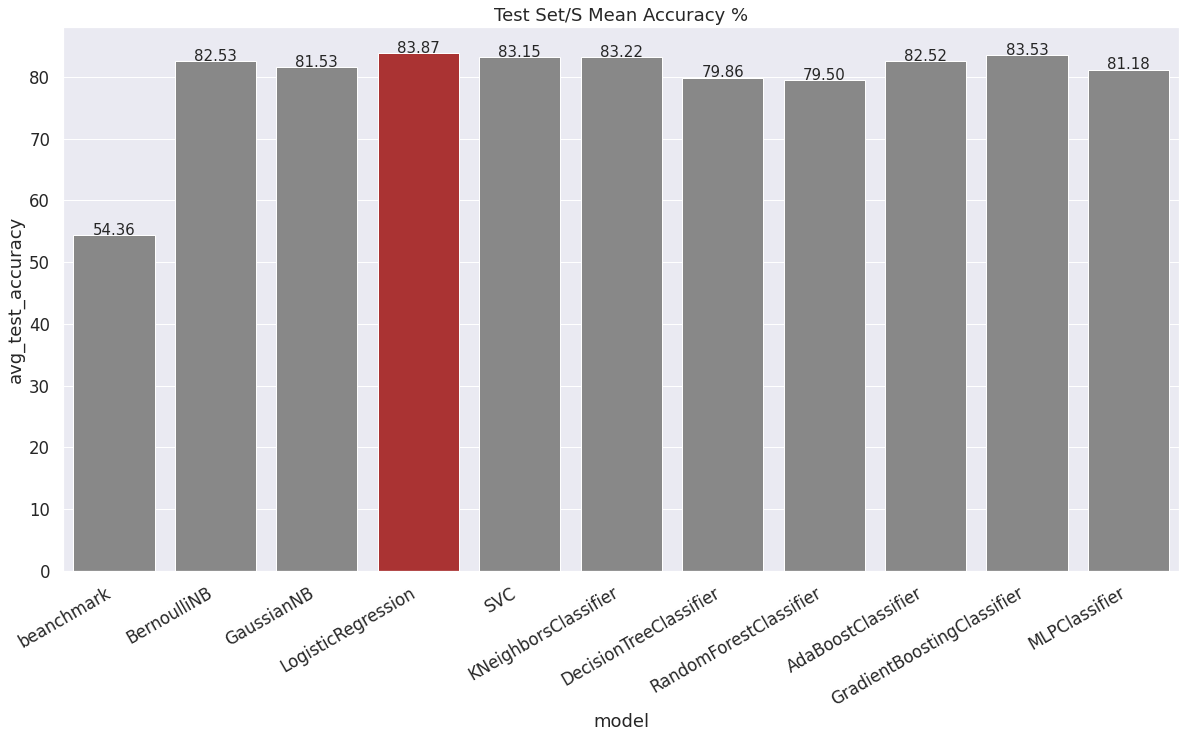

In [49]:
y = evaluation_df1.avg_test_accuracy



fig, ax = plt.subplots(figsize=(20, 10))
plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')
plot = sns.barplot(x=evaluation_df1.model, y=y)
plt.title("Test set/s Mean accuracy %".title())

# annotate the accuracy
for bar in plot.patches:
    plot.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 5),
                   textcoords='offset points')
    
for bar in ax.patches:
    bar.set_facecolor('#888888')

highlight = evaluation_df1.iloc[y.idxmax()].model

pos = y.idxmax()

ax.patches[pos].set_facecolor('#aa3333')

Note that this accuracies are a result of the best-performed hyperparamters & data type.

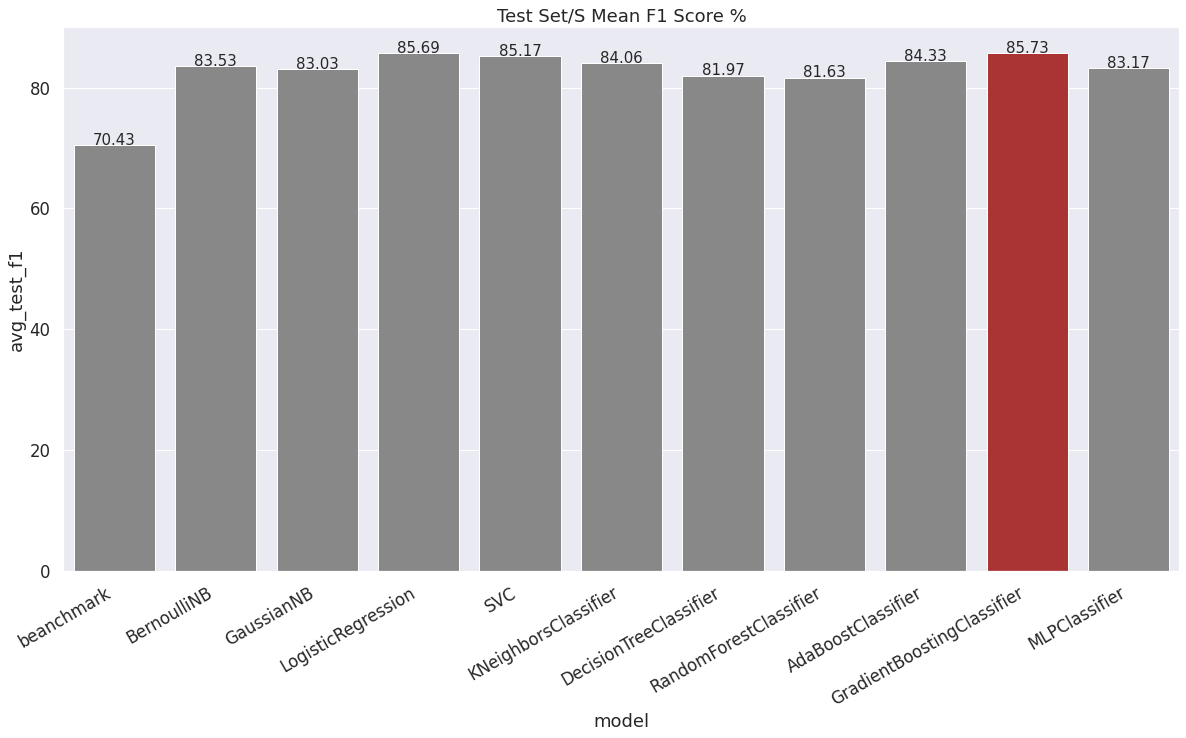

In [50]:
y = evaluation_df1.avg_test_f1


fig, ax = plt.subplots(figsize=(20, 10))
plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')
plot = sns.barplot(x=evaluation_df1.model, y=y)
plt.title("Test set/s Mean f1 score %".title())

# annotate the accuracy
for bar in plot.patches:
    plot.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 5),
                   textcoords='offset points')
    
for bar in ax.patches:
    bar.set_facecolor('#888888')

highlight = evaluation_df1.iloc[y.idxmax()].model

pos = y.idxmax()

ax.patches[pos].set_facecolor('#aa3333')

## And the winner is ... (Drumroll...) ...

# Logistic Regression!